## **Кластеризация**

### K-Means и EM-алгоритм

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import cluster, mixture
from sklearn import model_selection, preprocessing
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [11]:
teenagers = pd.read_csv('data/snsdata.zip')
teenagers.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**Задание 4.1**

Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка. Удалите все остальные признаки. Какова размерность вашего текущего набора данных?

In [12]:
teenagers.drop(['gradyear', 'gender',	'age', 'friends'], axis=1, inplace=True)
teenagers.shape

(30000, 36)

**Задание 4.2**

Теперь нормализуйте данные с помощью StandardScaler(). Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Ответ округлите до двух знаков после точки-разделителя.

In [46]:
X = teenagers.values
scaler = preprocessing.StandardScaler()
X_norm = scaler.fit_transform(X)

X_norm[0][0].round(2)

-0.33

**Задание 4.3**

Реализуйте алгоритм k-means c девятью кластерами. В качестве значения параметра random_state возьмите число 42. Выведите получившееся значение инерции (model.inertia_). Ответ округлите до двух знаков после точки-разделителя.

In [56]:
km = cluster.KMeans(n_clusters=9, random_state=42).fit(X_norm)
round(km.inertia_,2)

857169.1

**Задание 4.4**

Сколько подростков относится к наиболее многочисленному кластеру?
А сколько — к самому малочисленному?

In [67]:
teenagers['clasters'] = km.labels_
print(teenagers.clasters.value_counts().max(), teenagers.clasters.value_counts().min(), sep='\n')

19659
1


**Задание 4.5**

Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Давайте попробуем применить разные методы для нахождения числа кластеров. Будем выбирать количество кластеров из диапазона от 3 до 9.

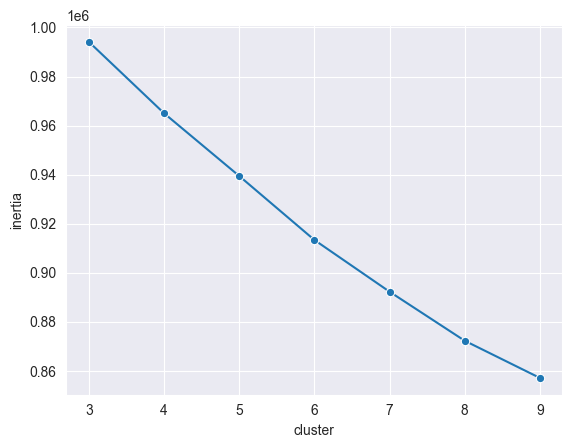

In [70]:
# 1. Для начала примените метод локтя. Каким в этом случае будет оптимальное число кластеров?

def get_inertia(cluster_num, X):
    model =  cluster.KMeans(n_clusters=cluster_num, random_state=42).fit(X)
    return model.inertia_

res = {"inertia": [], "cluster": []}

for cluster_num in range(3, 10):
    res["inertia"].append(get_inertia(cluster_num, X_norm))
    res["cluster"].append(cluster_num)

sns.set_style("darkgrid")
sns.lineplot(data=pd.DataFrame(res), x="cluster", y="inertia", marker= "o");

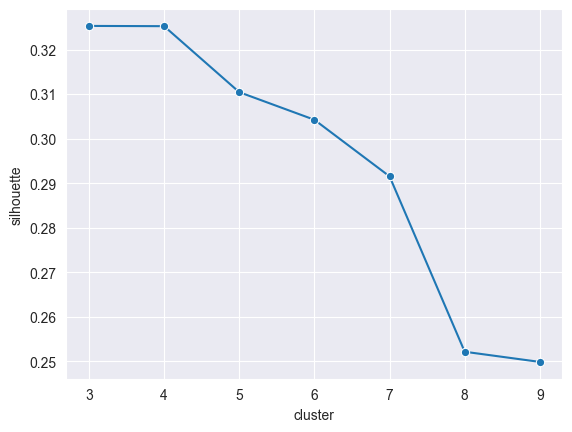

In [71]:
# 2. Теперь попробуйте подобрать оптимальное количество кластеров с помощью коэффициента силуэта. Каким оно будет?

def get_silhouette(cluster_num, X):
    model =  cluster.KMeans(n_clusters=cluster_num, random_state=42).fit(X)
    return metrics.silhouette_score(X, model.predict(X))

s_res = {"silhouette": [], "cluster": []}

for cluster_num in range(3, 10):
    s_res["silhouette"].append(get_silhouette(cluster_num, X_norm))
    s_res["cluster"].append(cluster_num)
    
sns.set_style("darkgrid")
sns.lineplot(data=pd.DataFrame(s_res), x="cluster", y="silhouette", marker= "o");

**Задание 4.6**

Мы будем использовать результаты, полученные в предыдущем задании с помощью коэффициента силуэта.

Реализуйте сегментацию подростков на выбранном количестве кластеров.

Для каждого кластера составьте топ-10 самых частых слов, назовём их ключевыми. Для этого сгруппируйте данные по кластерам, в каждом кластере вычислите среднее по каждому признаку, отсортируйте данные по убыванию и выделите первые 10 строк.

In [87]:
km = cluster.KMeans(n_clusters=3, random_state=42).fit(X_norm)
teenagers.clasters = km.labels_
top_5 = []
for i, j in teenagers.groupby('clasters'):
    top_5.append(set(j.iloc[:,:-1].mean().sort_values(ascending=False).head(10).index))

set.intersection(*top_5)

{'dance', 'god', 'hair', 'music'}

**Задание 4.7**

Итак, с k-means мы потренировались — теперь перейдём к EM-алгоритму.

Реализуйте EM-алгоритм (GaussianMixture) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра random_state возьмите число 42.

Сколько подростков алгоритм отнёс к самому многочисленному кластеру?

In [91]:
gm = mixture.GaussianMixture(n_components=3, random_state=42).fit(X_norm)
teenagers['clusters'] = gm.predict(X_norm)
teenagers.clusters.value_counts().max()

23426

**Задание 4.8**

В одном из кластеров оказался всего один человек. Давайте узнаем, что это за подросток и чем он(а) интересуется.

Отметьте три слова, которые чаще всего встречаются в сообщениях этого подростка:

In [142]:
teenagers[teenagers.clusters == 2].squeeze().sort_values(ascending=False).head(3)

blonde    327
sex        22
hair       12
Name: 14187, dtype: int64

### Агломеративная иерархическая кластеризация

In [197]:
bc = pd.read_csv('data/CC_GENERAL.zip')
bc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Задание 7.2**

Теперь приступим к анализу данных. По традиции начнём его с проверки данных на наличие пропущенных значений. Сколько всего пропусков в данных?

In [198]:
bc.isna().sum().sum()

314

**Задание 7.3**

Заполните все пропуски средними арифметическими для признаков. Каким будет среднее арифметическое для признака MINIMUM_PAYMENTS (если считать после заполнения пропущенных значений)? Округлите результат до двух знаков после точки-разделителя.

In [199]:
bc.fillna(bc.mean(numeric_only=True), inplace=True)
bc.MINIMUM_PAYMENTS.mean().round(2)

864.21

**Задание 7.4**

Теперь нормализуйте данные с помощью StandardScaler(). Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Округлите до двух знаков после точки-разделителя.

In [200]:
bc.drop('CUST_ID', axis=1, inplace=True)
X = bc.values
scaler = preprocessing.StandardScaler()
X_norm = scaler.fit_transform(X)

X_norm[0][0].round(2)

-0.73

**Задание 7.5**

Теперь можем приступать к кластеризации. Начнём с самого простого и популярного метода — k-means. Для того чтобы его применить, необходимо узнать число кластеров. Наилучший способ сделать это — применить коэффициент силуэта. Найдите с его помощью оптимальное количество кластеров, перебрав диапазон от 2 до 9 включительно. В этом и следующем заданиях для параметра random_state возьмём значение 42.

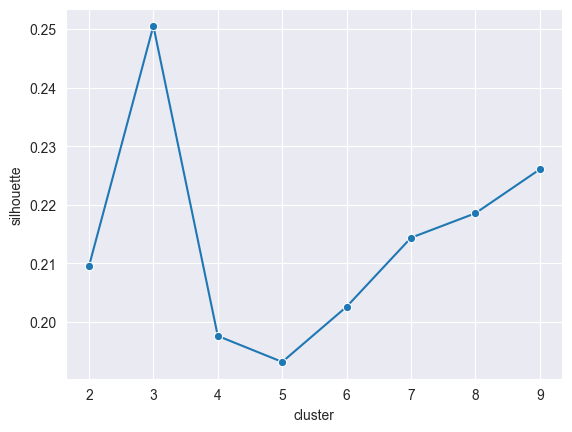

In [201]:
def get_silhouette(cluster_num, X):
    model =  cluster.KMeans(n_clusters=cluster_num, random_state=42).fit(X)
    return metrics.silhouette_score(X, model.predict(X))

s_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 10):
    s_res["silhouette"].append(get_silhouette(cluster_num, X_norm))
    s_res["cluster"].append(cluster_num)
    
sns.set_style("darkgrid")
sns.lineplot(data=pd.DataFrame(s_res), x="cluster", y="silhouette", marker= "o");

**Задание 7.6**

Теперь реализуем непосредственно кластеризацию k-means с оптимальным количеством кластеров, которое мы определили в предыдущем задании.

Сколько человек оказалось в самой малочисленной группе?

In [203]:
km_7_6 = cluster.KMeans(n_clusters=3, random_state=42).fit(X_norm)
bc['clusters_km'] = km_7_6.labels_
bc.clusters_km.value_counts().min()

1235

**Задание 7.7**

Попробуем применить DBSCAN. Для начала реализуйте его с параметрами по умолчанию.

Сколько кластеров было выделено?

In [204]:
cl_db = cluster.DBSCAN().fit(X_norm)
labels = set(cl_db.labels_)
len(labels)-(1 if -1 in labels else 0)

38

**Задание 7.8**

В предыдущем задании получилось очень много кластеров. Возможно, это случилось потому, что мы взяли параметры по умолчанию, а результат алгоритма DBSCAN, как вы помните, очень чувствителен к ним.

Давайте попробуем с помощью цикла перебрать параметр eps по значениям, заданным как np.arange(0.1,3,0.2), а параметр min_samples — по значениям, заданным как range(1,20,4). Найдите комбинацию, которая даёт максимальное значение коэффициента силуэта.

In [183]:
par_list = []
for i in np.arange(0.1,3,0.2):
    for j in range(1,20,4):
        cl_db = cluster.DBSCAN(eps=i, min_samples=j).fit(X_norm)
        par_list.append((i, j, metrics.silhouette_score(X_norm, cl_db.labels_)))

df_db = pd.DataFrame(par_list, columns=['eps', 'min_samples', 'sil_koef'])
df_db.sort_values('sil_koef', ascending=False).iloc[0].round(2)

eps            2.90
min_samples    5.00
sil_koef       0.62
Name: 71, dtype: float64

**Задание 7.9**

Теперь давайте реализуем агломеративную иерархическую кластеризацию. Переберите количество кластеров в диапазоне от 3 до 9 включительно и найдите то их число, которое будет давать максимальный коэффициент силуэта.

In [188]:
par_ag = []
for j in range(3,10):
    ag_cl = cluster.AgglomerativeClustering(n_clusters=j).fit(X_norm)
    par_ag.append((j, metrics.silhouette_score(X_norm, ag_cl.labels_)))

df_7_9 = pd.DataFrame(par_ag, columns=['n_clusters', 'sil_koef'])
df_7_9.sort_values('sil_koef', ascending=False).iloc[0].round(2)

n_clusters    6.00
sil_koef      0.17
Name: 3, dtype: float64

**Задание 7.10**

Сколько будет наблюдений в самом многочисленном классе, если мы обучим на наших данных модель агломеративной иерархической кластеризации с количеством кластеров, полученным в предыдущем задании?

In [205]:
ag_7_10 = cluster.AgglomerativeClustering(n_clusters=6).fit(X_norm)
bc['clusters_ag'] = ag_7_10.labels_
bc.clusters_ag.value_counts().max()

3946

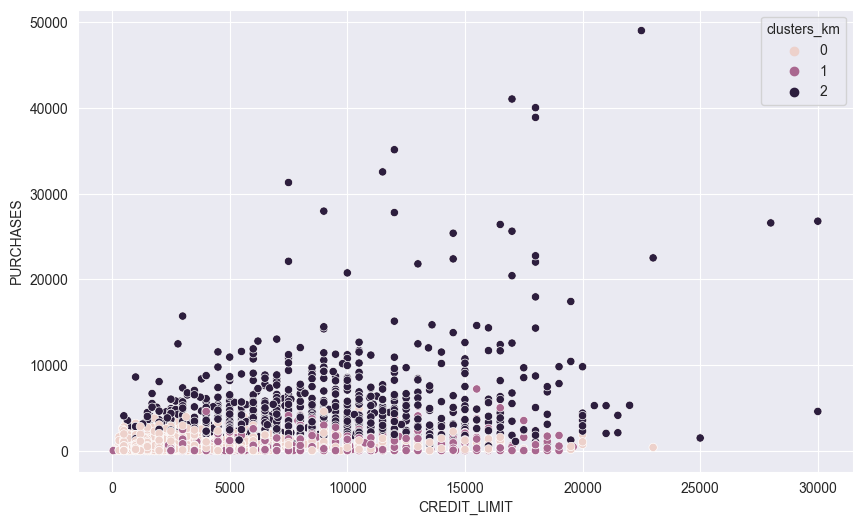

In [206]:
# визуализируем результаты кластеризации k-means, отобразив два признака — количество покупок и кредитный лимит
plt.figure(figsize=(10,6))
sns.scatterplot(data=bc, x='CREDIT_LIMIT', y='PURCHASES', hue='clusters_km')
plt.show();

In [196]:
bc.head('')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clasters_km,clasters_ag
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,0
